## How well do jobs and skills pay for Data Scientists?

Methodology

1. Evaluate median salary for top 6 data jobs
2. Find median salary per skill for Data Scientists
3. Visualise for highest paying skills and most demanded skills

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
# Filter for job_tiles in the UK

df_UK = df[(df['job_country'] == 'United Kingdom')].dropna(subset=['salary_year_avg'])

In [6]:
# Top 6 jobs_title_shorts
job_titles = df_UK['job_title_short'].value_counts().index[:6].tolist()

job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [7]:
# Filtering using the isin method
df_UK_top6 = df_UK[df_UK['job_title_short'].isin(job_titles)]

In [15]:
# Ordering through groupby of the median salaries
job_order = df_UK_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

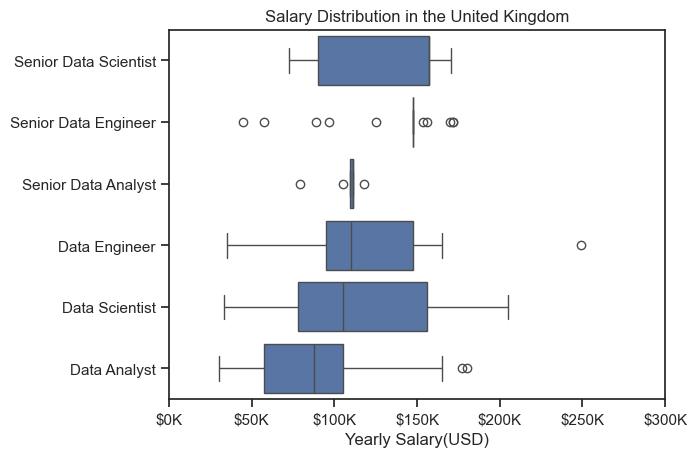

In [17]:
# Plotting boxplots using Seaborn
sns.boxplot(data=df_UK_top6, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')
plt.xlabel('Yearly Salary(USD)')
plt.ylabel('')
plt.title('Salary Distribution in the United Kingdom')
plt.xlim(0, 300000)
ticks_x = plt.FuncFormatter(lambda y, pos:f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

Investigate Median Salary Vs Skill for Data Scientists in the UK

In [18]:
df_DS_UK = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United Kingdom')].copy()

df_DS_UK = df_DS_UK.dropna(subset=['salary_year_avg'])

df_DS_UK = df_DS_UK.explode('job_skills')

df_DS_UK[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
1107,157500.0,python
1107,157500.0,numpy
1107,157500.0,pandas
1107,157500.0,scikit-learn
13764,109500.0,excel


In [23]:
# Finding the top paying skills
df_DS_top_pay = df_DS_UK.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

df_DS_top_pay = df_DS_top_pay.head(10)

In [26]:
# Finding the dataframe with most popular skills

df_DS_skills = df_DS_UK.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DS_skills = df_DS_skills.head(10).sort_values(by='median', ascending=False)
df_DS_skills

,count,median
job_skills,,
gcp,9,131867.0
looker,9,113500.0
r,18,113360.5
tableau,15,111500.0
sql,46,97985.0
python,50,89885.0
numpy,9,88128.0
aws,22,88128.0
pandas,9,88128.0


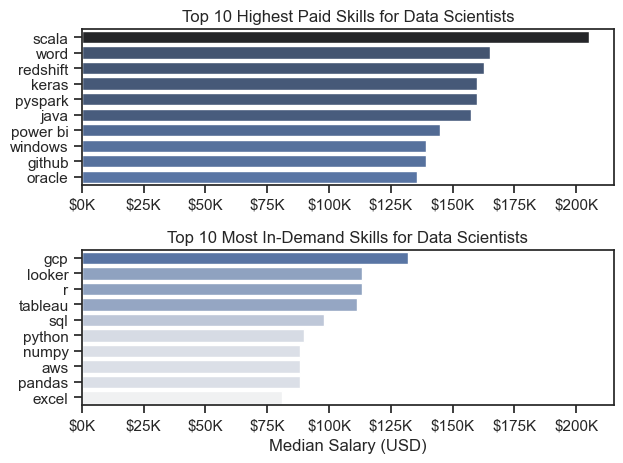

In [28]:
# Plotting
fig, ax = plt.subplots(2, 1)

sns.set_theme(style="ticks")


sns.barplot(data=df_DS_top_pay, x='median', y=df_DS_top_pay.index, ax=ax[0], hue='median', palette='dark:b_r')
ax[0].legend().remove()
ax[0].set_title('Top 10 Highest Paid Skills for Data Scientists')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))


sns.barplot(data=df_DS_skills, x='median', y=df_DS_skills.index, ax=ax[1], hue='median', palette='light:b')
ax[1].legend().remove()
ax[1].set_title('Top 10 Most In-Demand Skills for Data Scientists')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()